In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
# import data
df = pd.read_csv('basic_project_timelines.csv')

In [265]:
df.dtypes

Proect Name    object
Size           object
Start Date     object
End Date       object
dtype: object

In [266]:
# Remove spaces from column names
df.columns = df.columns.str.replace(' ', '_')

# Convert to lowercase
df.columns = df.columns.str.lower()

In [267]:
# Convert date columns to datetime
date_columns = ['start_date', 'end_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%d')

In [268]:
# Create column for the number of weeks between start and end dates
df['duration_weeks'] = (df['end_date'] - df['start_date']).dt.days / 7
df['duration_weeks'].describe()

count    21.000000
mean     19.829932
std      15.618841
min       0.428571
25%      11.571429
50%      13.142857
75%      22.428571
max      60.714286
Name: duration_weeks, dtype: float64

In [269]:
#df

# KDE plots

Text(0.5, 1.0, 'Project Duration by Size')

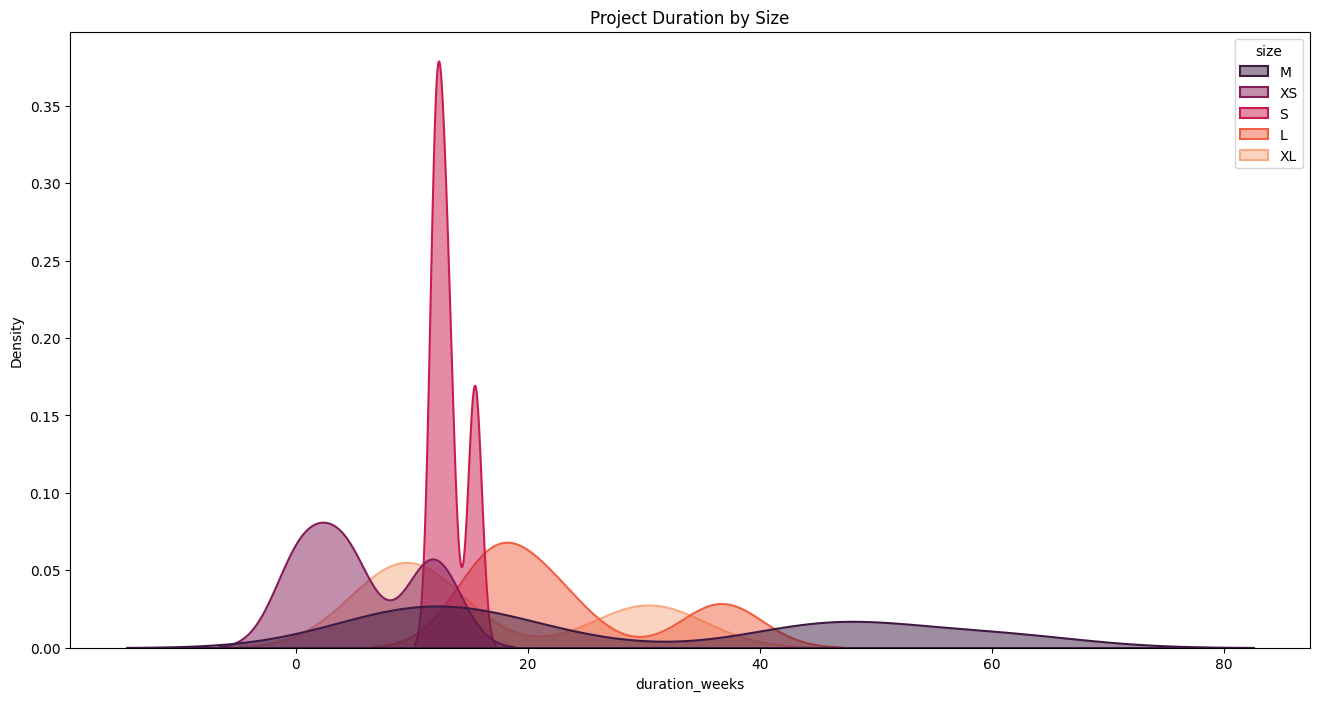

In [270]:
custom_order = ['XL', 'L', 'M', 'S', 'XS']
plt.figure(figsize=(16, 8))
palette = sns.color_palette("rocket", len(custom_order))

# Create KDE plots for each size category
sns.kdeplot(data=df, x='duration_weeks', hue='size', common_norm=False, palette=palette,
            fill=True, alpha=0.5, linewidth=1.5, bw_adjust=0.5)


plt.title('Project Duration by Size')

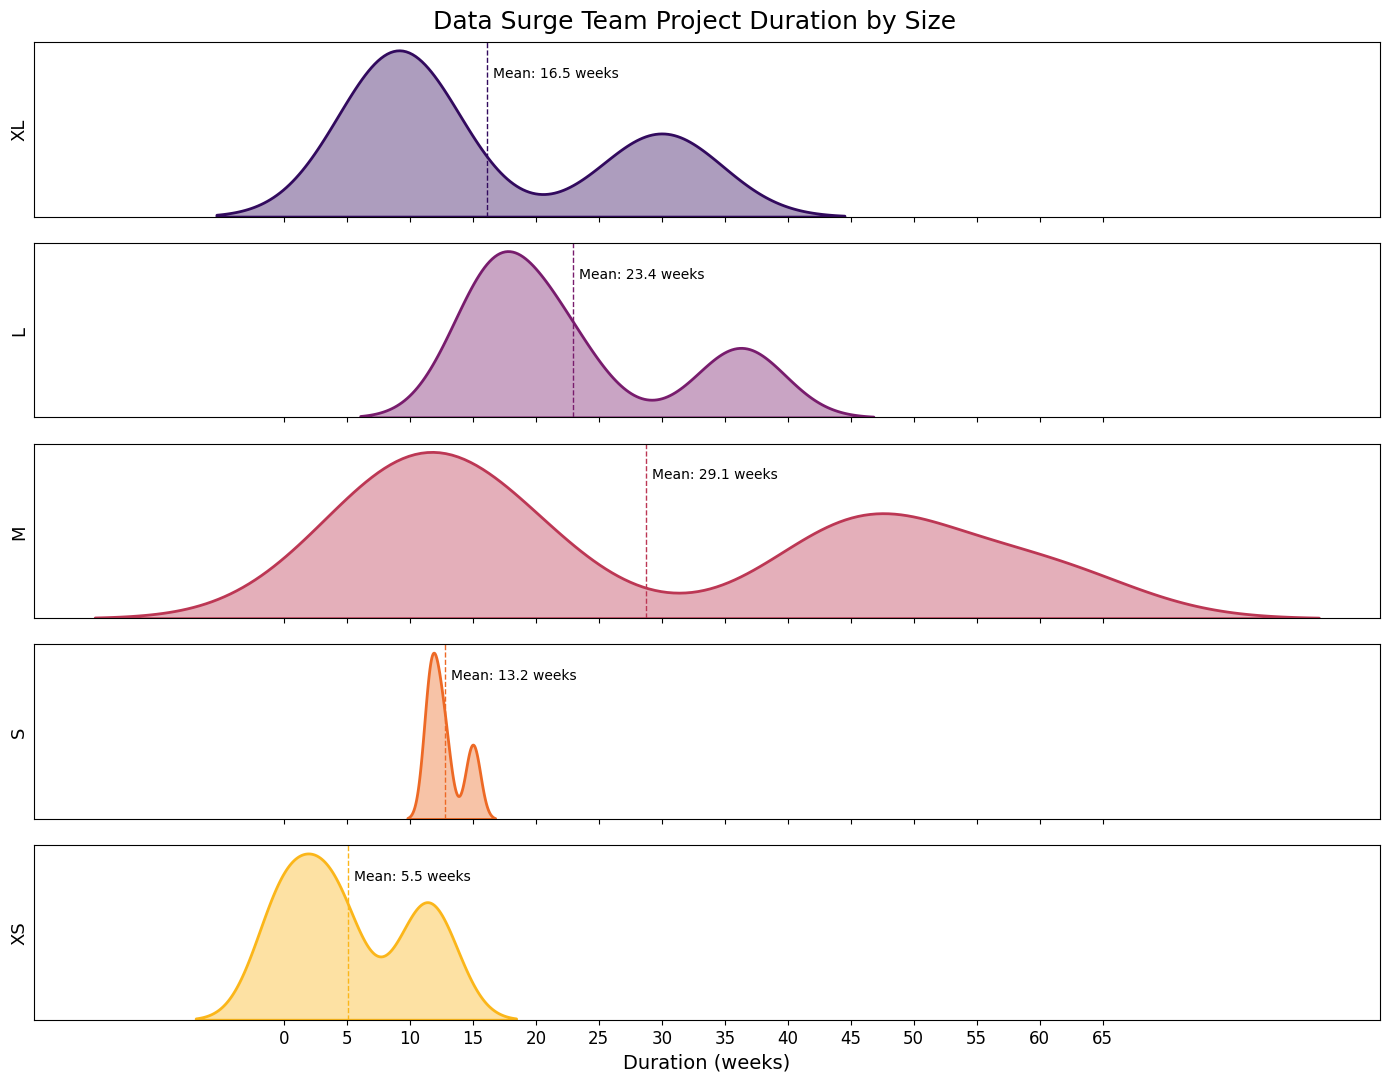

In [271]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

custom_order = ['XL', 'L', 'M', 'S', 'XS']
palette = sns.color_palette("inferno", len(custom_order))

# Create a figure with subplots for each size category
fig, axes = plt.subplots(len(custom_order), 1, figsize=(14, 11), sharex=True)

# Determine x-axis range
x_min, x_max = df['duration_weeks'].min(), df['duration_weeks'].max()

# Define x-axis ticks at 5-week intervals
tick_step = 5
x_ticks = np.arange(x_min, x_max + tick_step, tick_step)

# Create separate KDE plots for each size in the custom order
for i, size in enumerate(custom_order):
    size_data = df[df['size'] == size]
    
    sns.kdeplot(data=size_data, x='duration_weeks', 
                color=palette[i], fill=True, alpha=0.4,
                linewidth=2, bw_adjust=0.5, ax=axes[i])
    
    axes[i].set_ylabel(size, fontsize=13)
    axes[i].set_yticks([])  # Remove y-ticks for clarity
    
    mean_duration = size_data['duration_weeks'].mean()
    axes[i].axvline(x=mean_duration, color=palette[i], linestyle='--', linewidth=1)
    axes[i].text(mean_duration + 0.5, axes[i].get_ylim()[1] * 0.8, 
                 f'Mean: {mean_duration:.1f} weeks', color="black")

# Apply x-axis ticks every 5 weeks
axes[-1].set_xticks(x_ticks)
axes[-1].set_xticklabels([f"{tick:.0f}" for tick in x_ticks], fontsize=12)  # Format as integers

# Add overall title and labels
plt.suptitle('Data Surge Team Project Duration by Size', fontsize=18, y=0.98)
plt.xlabel('Duration (weeks)', fontsize=14)
plt.tight_layout()
plt.subplots_adjust(hspace=0.15, top=0.95)
plt.show()
